# Import Statements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime
from datetime import timedelta
import math
import random
import timeit

---

# Weather Data

## First look
First we read our data and have a first look on the values and their meaning.

In [6]:
# first we figure out the timeframe of our data entries
marburg = pd.read_csv("../0_data/marburg.csv")
duisburg = pd.read_csv("../0_data/duisburg.csv")

In [7]:
marburg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164205 entries, 0 to 164204
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   day            164205 non-null  object 
 1   time           164205 non-null  object 
 2   b_number       164205 non-null  int64  
 3   city           164205 non-null  object 
 4   trip_duration  164205 non-null  object 
 5   orig_lat       164205 non-null  float64
 6   orig_lng       164205 non-null  float64
 7   dest_lat       164205 non-null  float64
 8   dest_lng       164205 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 11.3+ MB


In [8]:
duisburg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132294 entries, 0 to 132293
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   day            132294 non-null  object 
 1   time           132294 non-null  object 
 2   b_number       132294 non-null  int64  
 3   city           132294 non-null  object 
 4   trip_duration  132294 non-null  object 
 5   orig_lat       132294 non-null  float64
 6   orig_lng       132294 non-null  float64
 7   dest_lat       132294 non-null  float64
 8   dest_lng       132294 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 9.1+ MB


In [9]:
print("Marburg:")
print("first date: ", marburg['day'].min())
print("last date: ", marburg['day'].max())
print("")
print("Duisburg")
print("first date: ", duisburg['day'].min())
print("last date: ", duisburg['day'].max())

Marburg:
first date:  2019-01-20
last date:  2020-01-20

Duisburg
first date:  2019-01-20
last date:  2020-01-20


In [10]:
marburg_precipitation = pd.read_csv("../0_data/weather/marburg_precipitation.csv")
marburg_temperature = pd.read_csv("../0_data/weather/marburg_temperature.csv")

In [11]:
marburg_precipitation.head()

,Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,R1_MN008,3164,201901200000,0.0,0,3
1,R1_MN008,3164,201901200100,0.0,0,3
2,R1_MN008,3164,201901200200,0.0,0,3
3,R1_MN008,3164,201901200300,0.0,0,3
4,R1_MN008,3164,201901200400,0.0,0,3


In [12]:
marburg_temperature.head()

,Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,TT_TU_MN009,3164,201901200000,-7.9,1,7
1,TT_TU_MN009,3164,201901200100,-8.3,1,7
2,TT_TU_MN009,3164,201901200200,-8.7,1,7
3,TT_TU_MN009,3164,201901200300,-8.9,1,7
4,TT_TU_MN009,3164,201901200400,-8.7,1,7


In [13]:
# We clean up our data by throwing away unneccesary columns and renaming them to keep the names consistent.
marburg_precipitation.drop("Produkt_Code", axis=1, inplace=True)
marburg_precipitation.drop("SDO_ID", axis=1, inplace=True)
marburg_precipitation.drop("Qualitaet_Niveau", axis=1, inplace=True)
marburg_precipitation.drop("Qualitaet_Byte", axis=1, inplace=True)
marburg_precipitation.rename(columns={'Wert':'precipitation'}, inplace=True)
marburg_precipitation.rename(columns={'Zeitstempel':'timestamp'}, inplace=True)

In [14]:
marburg_temperature.drop("Produkt_Code", axis=1, inplace=True)
marburg_temperature.drop("SDO_ID", axis=1, inplace=True)
marburg_temperature.drop("Qualitaet_Niveau", axis=1, inplace=True)
marburg_temperature.drop("Qualitaet_Byte", axis=1, inplace=True)
marburg_temperature.rename(columns={'Wert':'temperature'}, inplace=True)
marburg_temperature.rename(columns={'Zeitstempel':'timestamp'}, inplace=True)

In [15]:
marburg_temperature.head()

,timestamp,temperature
0,201901200000,-7.9
1,201901200100,-8.3
2,201901200200,-8.7
3,201901200300,-8.9
4,201901200400,-8.7


In [16]:
marburg_precipitation.head()

,timestamp,precipitation
0,201901200000,0.0
1,201901200100,0.0
2,201901200200,0.0
3,201901200300,0.0
4,201901200400,0.0


In [17]:
#Now we merge our two dataframes in one dataframe, which will have the necessary information about the weather
marburg_weather = pd.merge(marburg_temperature, marburg_precipitation, how='outer', on='timestamp')

In [18]:
marburg_weather.head()

,timestamp,temperature,precipitation
0,201901200000,-7.9,0.0
1,201901200100,-8.3,0.0
2,201901200200,-8.7,0.0
3,201901200300,-8.9,0.0
4,201901200400,-8.7,0.0


In [19]:
marburg_weather["timestamp"] = pd.to_datetime(marburg_weather.timestamp, format="%Y%m%d%H%M")

marburg_weather.set_index(marburg_weather["timestamp"], inplace=True)
marburg_weather.drop('timestamp', axis=1, inplace=True)

In [20]:
marburg_weather.head()

,temperature,precipitation
timestamp,,
2019-01-20 00:00:00,-7.9,0.0
2019-01-20 01:00:00,-8.3,0.0
2019-01-20 02:00:00,-8.7,0.0
2019-01-20 03:00:00,-8.9,0.0
2019-01-20 04:00:00,-8.7,0.0


In [21]:
# note that there are null in the temperature column
marburg_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2019-01-20 00:00:00 to 2019-08-21 09:00:00
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    8124 non-null   float64
 1   precipitation  8784 non-null   float64
dtypes: float64(2)
memory usage: 205.9 KB


In [22]:
print('number of null values in temperature column: ' + str(len(marburg_weather['temperature'])-len(marburg_weather['temperature'].dropna())))
print('number of null values in temperature column: ' + str(len(marburg_weather['precipitation'])-len(marburg_weather['precipitation'].dropna())))

number of null values in temperature column: 660
number of null values in temperature column: 0


In [23]:
# we decided to use the interpolate function with method 'time'. TODO: Describe function and idea why it is useful
marburg_weather["temperature_interpol"] = marburg_weather["temperature"].interpolate(method="time")

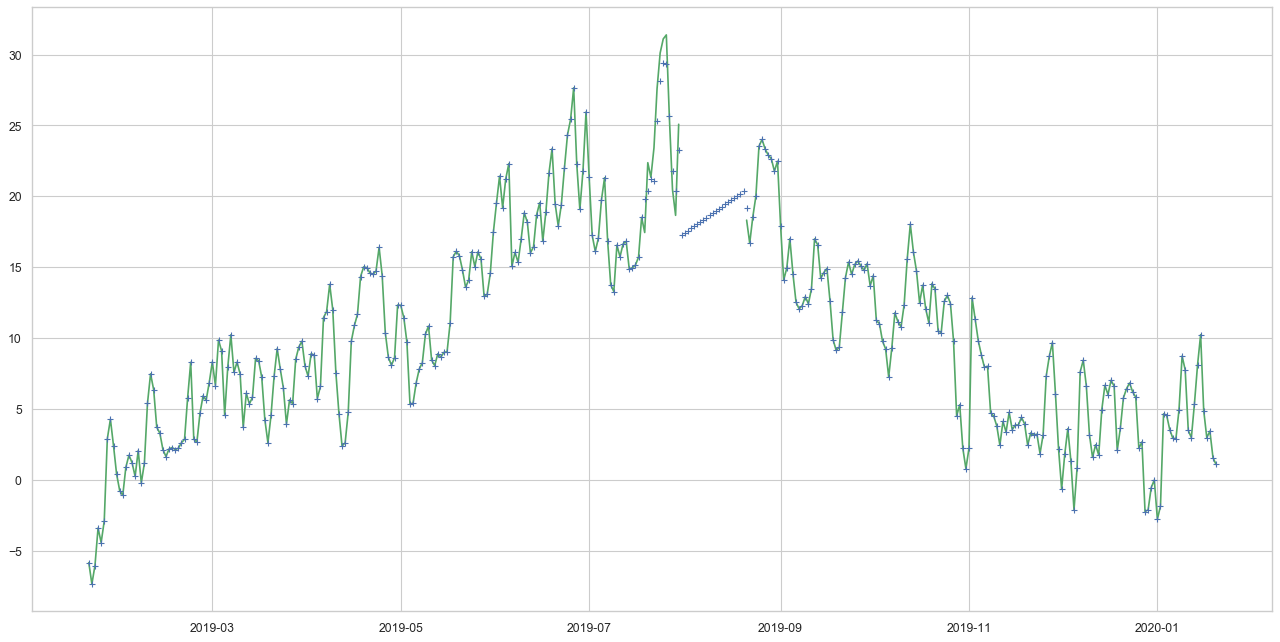

In [24]:
# to get a better understanding of our data, we resample it to a daily value and plot it in a graph
fix,ax = plt.subplots(figsize=(20,10), dpi=80)
marburg_weather_daily_resample = marburg_weather.resample('D').mean()
ax.plot(
    marburg_weather_daily_resample.index,
    marburg_weather_daily_resample["temperature"],"g-",
    marburg_weather_daily_resample.index , 
    marburg_weather_daily_resample["temperature_interpol"], 'b+', 
)
plt.show()

As we can see there is a major gap of null values in our temperature. This gap is about a month long. Which is way too long to fix it with data filling methods. So we will use the temperature data of the second closest station 'Neu-Ulrichstein'.

In [25]:
# we drop our old temperature data
marburg_weather.rename(columns={'temperature':'temperature_station_1'}, inplace=True)
marburg_weather.drop("temperature_interpol", axis=1, inplace=True)

In [28]:
marburg_temperature_nu = pd.read_csv("../0_data/weather/marburg_temperature_nu.csv") # additionally read data for neu-ulrichstein

In [29]:
# We clean up our new data by throwing away unneccesary columns and renaming them to keep the names consistent.
marburg_temperature_nu.drop("Produkt_Code", axis=1, inplace=True)
marburg_temperature_nu.drop("SDO_ID", axis=1, inplace=True)
marburg_temperature_nu.drop("Qualitaet_Niveau", axis=1, inplace=True)
marburg_temperature_nu.drop("Qualitaet_Byte", axis=1, inplace=True)
marburg_temperature_nu.rename(columns={'Wert':'temperature_station_2'}, inplace=True)
marburg_temperature_nu.rename(columns={'Zeitstempel':'timestamp'}, inplace=True)

In [30]:
marburg_temperature_nu.head()

,timestamp,temperature_station_2
0,201901200000,-6.3
1,201901200100,-6.8
2,201901200200,-6.7
3,201901200300,-7.0
4,201901200400,-6.8


In [31]:
marburg_temperature_nu["timestamp"] = pd.to_datetime(marburg_temperature_nu.timestamp, format="%Y%m%d%H%M")

marburg_temperature_nu.set_index(marburg_temperature_nu["timestamp"], inplace=True)
marburg_temperature_nu.drop('timestamp', axis=1, inplace=True)

In [32]:
marburg_temperature_nu.head()

,temperature_station_2
timestamp,
2019-01-20 00:00:00,-6.3
2019-01-20 01:00:00,-6.8
2019-01-20 02:00:00,-6.7
2019-01-20 03:00:00,-7.0
2019-01-20 04:00:00,-6.8


In [33]:
marburg_weather = pd.merge(marburg_temperature_nu, marburg_weather, how='outer', right_index=True, left_index=True)

In [34]:
marburg_weather.head()

,temperature_station_2,temperature_station_1,precipitation
timestamp,,,
2019-01-20 00:00:00,-6.3,-7.9,0.0
2019-01-20 01:00:00,-6.8,-8.3,0.0
2019-01-20 02:00:00,-6.7,-8.7,0.0
2019-01-20 03:00:00,-7.0,-8.9,0.0
2019-01-20 04:00:00,-6.8,-8.7,0.0


In [35]:
marburg_weather['temperature_station_1'].fillna(marburg_weather['temperature_station_2'], inplace=True)

In [36]:
marburg_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2019-01-20 00:00:00 to 2020-01-20 23:00:00
Freq: H
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temperature_station_2  8690 non-null   float64
 1   temperature_station_1  8784 non-null   float64
 2   precipitation          8784 non-null   float64
dtypes: float64(3)
memory usage: 274.5 KB


In [37]:
marburg_weather.drop("temperature_station_2", axis=1, inplace=True)
marburg_weather.rename(columns={'temperature_station_1':'temperature'}, inplace=True)

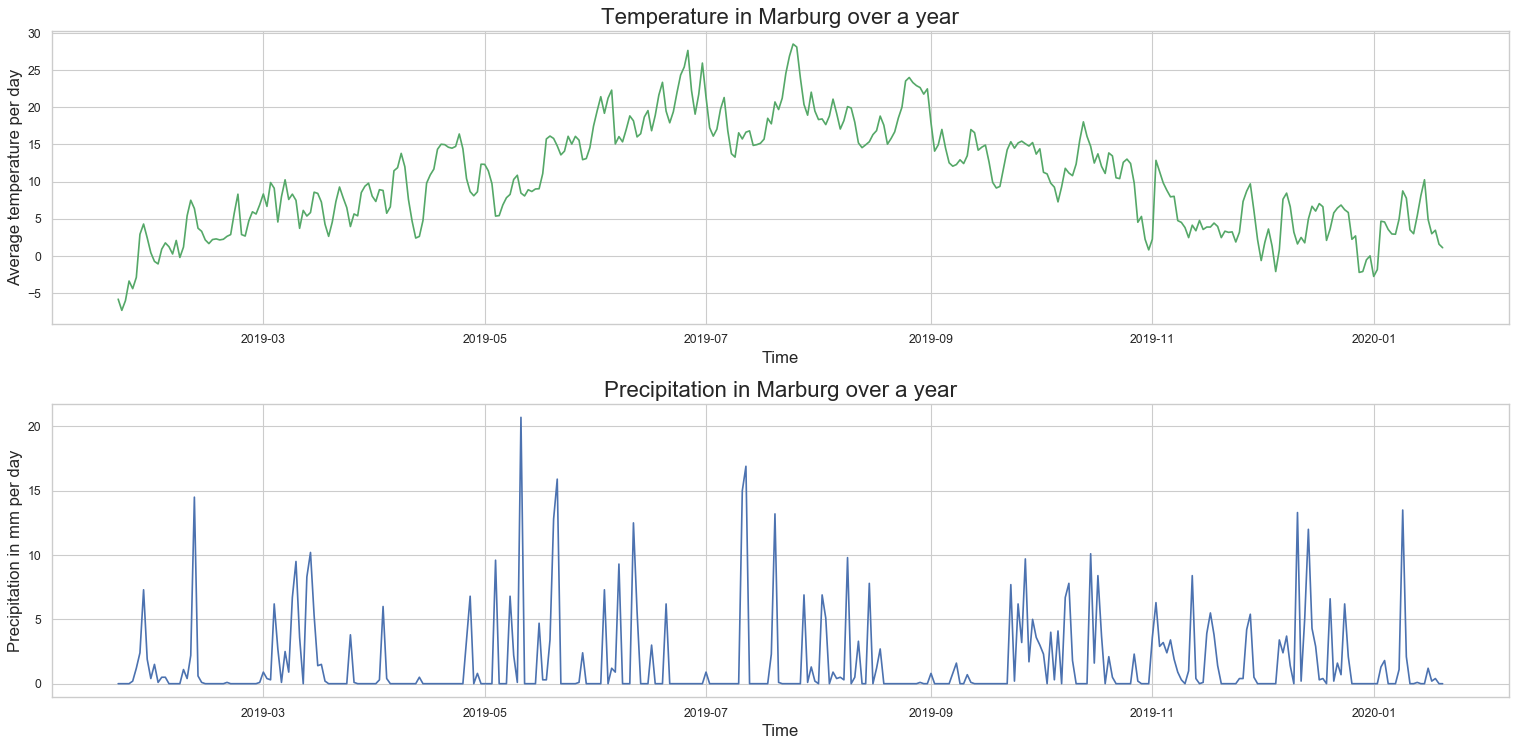

In [38]:
# to get a better understanding of our data, we resample it to a daily value and plot it in a graph

marburg_weather_daily_resample_prec = marburg_weather.resample('D').sum()
marburg_weather_daily_resample_temp = marburg_weather.resample('D').mean()

fig,axes = plt.subplots(nrows=2, figsize=(20,10), dpi=80)
fig.tight_layout(pad=4.0)

axes[0].plot(
    marburg_weather_daily_resample_temp.index,
    marburg_weather_daily_resample_temp["temperature"],"g-",
)
axes[0].set_title('Temperature in Marburg over a year', fontsize=20)
axes[0].set_xlabel('Time', fontsize=15)
axes[0].set_ylabel('Average temperature per day', fontsize=15)

axes[1].plot(
    marburg_weather_daily_resample_prec.index,
    marburg_weather_daily_resample_prec["precipitation"],"b-",
)
axes[1].set_title('Precipitation in Marburg over a year', fontsize=20)
axes[1].set_xlabel('Time', fontsize=15)
axes[1].set_ylabel('Precipitation in mm per day', fontsize=15)

plt.show()

In [34]:
marburg_weather.to_pickle('../0_data/weather/marburg_weather.pkl')

In [39]:
# duisburg
duisburg_temperature = pd.read_csv("../0_data/weather/duisburg_temperature.csv")
duisburg_percipitation = pd.read_csv("../0_data/weather/duisburg_percipitation.csv")

In [40]:
duisburg_percipitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Produkt_Code      8784 non-null   object 
 1   SDO_ID            8784 non-null   int64  
 2   Zeitstempel       8784 non-null   int64  
 3   Wert              8784 non-null   float64
 4   Qualitaet_Niveau  8784 non-null   int64  
 5   Qualitaet_Byte    8784 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 411.9+ KB


In [41]:
duisburg_temperature.head()

,Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,TT_TU_MN009,13670,201901200000,-1.8,1,7
1,TT_TU_MN009,13670,201901200100,-2.5,1,7
2,TT_TU_MN009,13670,201901200200,-2.5,1,7
3,TT_TU_MN009,13670,201901200300,-3.1,1,7
4,TT_TU_MN009,13670,201901200400,-3.6,1,7


In [42]:
duisburg_percipitation.head()

,Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,R1_MN008,13670,201901200000,0.0,0,3
1,R1_MN008,13670,201901200100,0.0,0,3
2,R1_MN008,13670,201901200200,0.0,0,3
3,R1_MN008,13670,201901200300,0.0,0,3
4,R1_MN008,13670,201901200400,0.0,0,3


In [43]:
duisburg_percipitation.drop("Produkt_Code", axis=1, inplace=True)
duisburg_percipitation.drop("SDO_ID", axis=1, inplace=True)
duisburg_percipitation.drop("Qualitaet_Niveau", axis=1, inplace=True)
duisburg_percipitation.drop("Qualitaet_Byte", axis=1, inplace=True)
duisburg_percipitation.rename(columns={'Wert':'precipitation'}, inplace=True)

In [44]:
duisburg_percipitation

,Zeitstempel,precipitation
0,201901200000,0.0
1,201901200100,0.0
2,201901200200,0.0
3,201901200300,0.0
4,201901200400,0.0
...,...,...
8779,202001201900,0.0
8780,202001202000,0.0
8781,202001202100,0.0
8782,202001202200,0.0


In [45]:
duisburg_temperature.drop("Produkt_Code", axis=1, inplace=True)
duisburg_temperature.drop("SDO_ID", axis=1, inplace=True)
duisburg_temperature.drop("Qualitaet_Niveau", axis=1, inplace=True)
duisburg_temperature.drop("Qualitaet_Byte", axis=1, inplace=True)
duisburg_temperature.rename(columns={'Wert':'temperature'}, inplace=True)

In [46]:
duisburg_temperature

,Zeitstempel,temperature
0,201901200000,-1.8
1,201901200100,-2.5
2,201901200200,-2.5
3,201901200300,-3.1
4,201901200400,-3.6
...,...,...
8779,202001201900,3.2
8780,202001202000,2.8
8781,202001202100,2.5
8782,202001202200,2.2


In [47]:
duisburg_weather = pd.merge(duisburg_temperature, duisburg_percipitation, how='outer', on='Zeitstempel', left_index=True, right_index=True)
duisburg_weather

,Zeitstempel,temperature,precipitation
0,201901200000,-1.8,0.0
1,201901200100,-2.5,0.0
2,201901200200,-2.5,0.0
3,201901200300,-3.1,0.0
4,201901200400,-3.6,0.0
...,...,...,...
8779,202001201900,3.2,0.0
8780,202001202000,2.8,0.0
8781,202001202100,2.5,0.0
8782,202001202200,2.2,0.0


In [48]:
duisburg_weather["datetime"] = pd.to_datetime(duisburg_weather['Zeitstempel'], format="%Y%m%d%H%M")
duisburg_weather.drop("Zeitstempel", axis=1, inplace=True)
# duisburg_weather["date"] = duisburg_weather["datetime"].map(get_date)

duisburg_weather.set_index(duisburg_weather["datetime"], inplace=True)
duisburg_weather.drop("datetime", axis=1, inplace=True)

In [49]:
duisburg_weather

,temperature,precipitation
datetime,,
2019-01-20 00:00:00,-1.8,0.0
2019-01-20 01:00:00,-2.5,0.0
2019-01-20 02:00:00,-2.5,0.0
2019-01-20 03:00:00,-3.1,0.0
2019-01-20 04:00:00,-3.6,0.0
...,...,...
2020-01-20 19:00:00,3.2,0.0
2020-01-20 20:00:00,2.8,0.0
2020-01-20 21:00:00,2.5,0.0


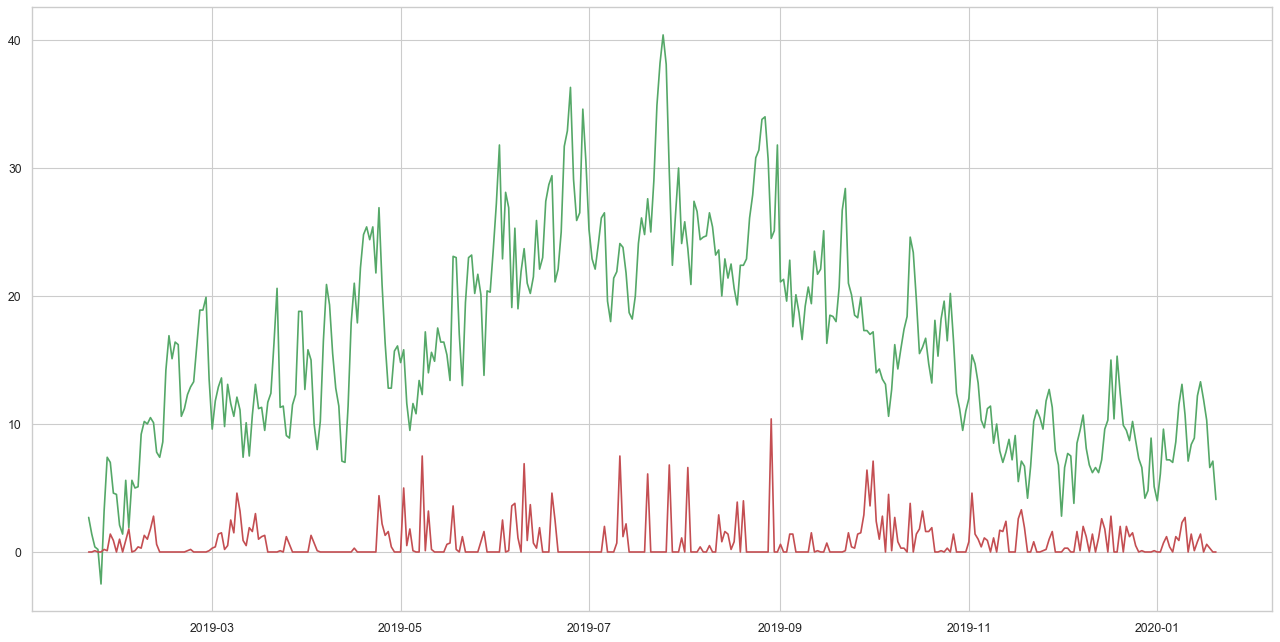

In [50]:
fix,ax = plt.subplots(figsize=(20,10), dpi=80)
duisburg_weather_daily_resample = duisburg_weather.resample('D').max()
ax.plot(
    duisburg_weather_daily_resample.index,
    duisburg_weather_daily_resample["temperature"],"g-",
    duisburg_weather_daily_resample.index,
    duisburg_weather_daily_resample["precipitation"], "r"
)
plt.show()

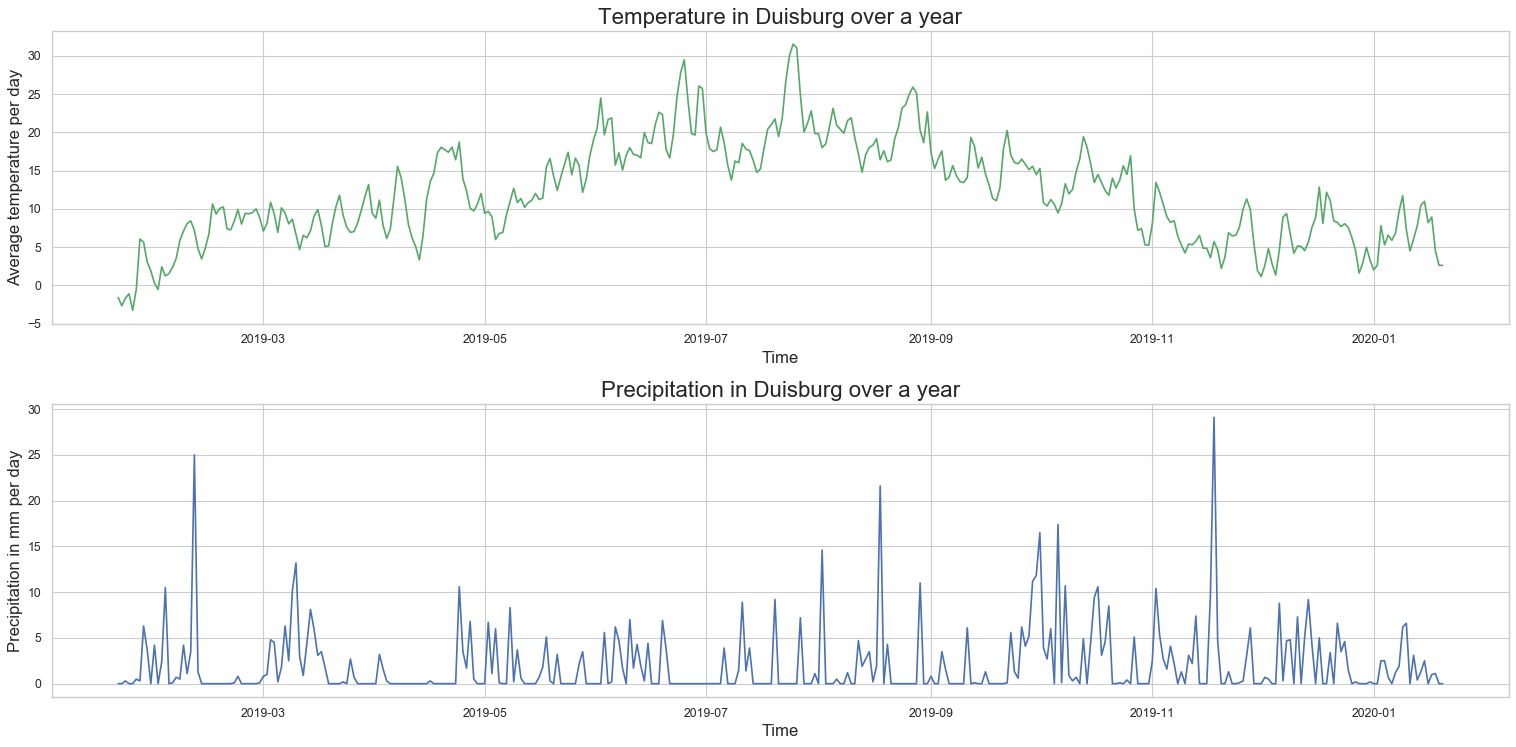

In [51]:
# to get a better understanding of our data, we resample it to a daily value and plot it in a graph

duisburg_weather_daily_resample_prec = duisburg_weather.resample('D').sum()
duisburg_weather_daily_resample_temp = duisburg_weather.resample('D').mean()

fig,axes = plt.subplots(nrows=2, figsize=(20,10), dpi=80)
fig.tight_layout(pad=4.0)

axes[0].plot(
    duisburg_weather_daily_resample_temp.index,
    duisburg_weather_daily_resample_temp["temperature"],"g-",
)
axes[0].set_title('Temperature in Duisburg over a year', fontsize=20)
axes[0].set_xlabel('Time', fontsize=15)
axes[0].set_ylabel('Average temperature per day', fontsize=15)

axes[1].plot(
    duisburg_weather_daily_resample_prec.index,
    duisburg_weather_daily_resample_prec["precipitation"],"b-",
)
axes[1].set_title('Precipitation in Duisburg over a year', fontsize=20)
axes[1].set_xlabel('Time', fontsize=15)
axes[1].set_ylabel('Precipitation in mm per day', fontsize=15)

plt.show()

In [52]:
duisburg_weather.to_pickle('../0_data/weather/duisburg_weather.pkl')